Лабораторная работа номер 10

In [10]:
import numpy as np
from sympy import *

Упражнение 1

In [11]:
x = symbols('x')
y = cos(x)
n = 0
x1 = float(diff(y,x,1).subs(x,1))
x2 = float(diff(y,x,2).subs(x,1))
x3 = float(diff(y,x,3).subs(x,1))
x4 = float(diff(y,x,4).subs(x,1))
x5 = float(diff(y,x,5).subs(x,1))

f = open('ex_1.txt','a')
f.write('Таблица производных функции y = cos(x)\n')
f.write(" _________________ \n")
f.write("|   n   |    y'   |\n")
f.write(" _________________ \n")
for i in x1,x2,x3,x4,x5:
    n = n+1
    f.write("|   {n:1.0f}   | {i:7.4f} |\n".format(i=i,n=n))
f.write('|_______|_________|')
f.close()

In [12]:
file = open("ex_1.txt", "r")
print(file.read())
file.close()

Таблица производных функции y = cos(x)
 _________________ 
|   n   |    y'   |
 _________________ 
|   1   | -0.8415 |
|   2   | -0.5403 |
|   3   |  0.8415 |
|   4   |  0.5403 |
|   5   | -0.8415 |
|_______|_________|


Упражнение 2

In [13]:
def rowPrint(array):
    s = [[str(e) for e in row] for row in array]
    lens = [max(map(len, col)) for col in zip(*s)]
    fmt = '\t'.join('{{:{}}}'.format(x) for x in lens)
    table = [fmt.format(*row) for row in s]
    print('\n'.join(table))
    print("\n")


def collectArray(function, derNumber, point):
    y = function
    arr = [[], [], []]
    for i in range(derNumber + 1):
        arr[0].append(i)
        arr[1].append(y)
        arr[2].append(round(y.subs(x, point), 2))
        y = y.diff(x)
    return arr

x = Symbol('x')

y = cos(x)
rowPrint(collectArray(y, 5, 0))

y = sin(x)
rowPrint(collectArray(y, 5, 0))

y = ln(1 + x)
rowPrint(collectArray(y, 5, 0))

0     	1      	2      	3     	4     	5      
cos(x)	-sin(x)	-cos(x)	sin(x)	cos(x)	-sin(x)
1     	0      	-1     	0     	1     	0      


0     	1     	2      	3      	4     	5     
sin(x)	cos(x)	-sin(x)	-cos(x)	sin(x)	cos(x)
0     	1     	0      	-1     	0     	1     


0         	1        	2            	3           	4            	5            
log(x + 1)	1/(x + 1)	-1/(x + 1)**2	2/(x + 1)**3	-6/(x + 1)**4	24/(x + 1)**5
0         	1        	-1           	2           	-6           	24           




Упражнение 3

In [14]:
def getFuncDerValue(func, point, n):
    arr = []
    for i in range(n + 1):
        arr.append(round(func.subs(x, point), 2))
        func = func.diff(x)
    return arr

x = Symbol('x')

print(getFuncDerValue(cos(x), 0, 4))
print(getFuncDerValue(sin(x), 0, 4))
print(getFuncDerValue(ln(1 + x), 0, 7))

[1, 0, -1, 0, 1]
[0, 1, 0, -1, 0]
[0, 1, -1, 2, -6, 24, -120, 720]


Упражнение 4

In [15]:
import math

def getTaylor(array):
    x0 = array[0]
    n = array[1]
    vec = array[2]
    collectTaylor(x0, n, vec)

def collectTaylor(point, num, values):
    larr = []
    for i in range(num + 1):
        larr.append(round(values[i] / math.factorial(i), i + 2) * (x - point) ** i)
    eq = 0
    for i in range(len(larr)):
        eq += larr[i]
    print(eq)

def getFuncDerValue(func, point, n):
    arr = []
    for i in range(n + 1):
        arr.append(round(func.subs(x, point), 2))
        func = func.diff(x)
    return arr


А)

In [16]:
x = Symbol('x')

print('f(x) = sin(x)')
f = sin(x)
n = 1
point = 0
getTaylor([point, n, getFuncDerValue(f, point, n)])

n = 2
point = 0
getTaylor([point, n, getFuncDerValue(f, point, n)])

n = 3
point = 0
getTaylor([point, n, getFuncDerValue(f, point, n)])

f(x) = sin(x)
x
x
-0.16667*x**3 + x


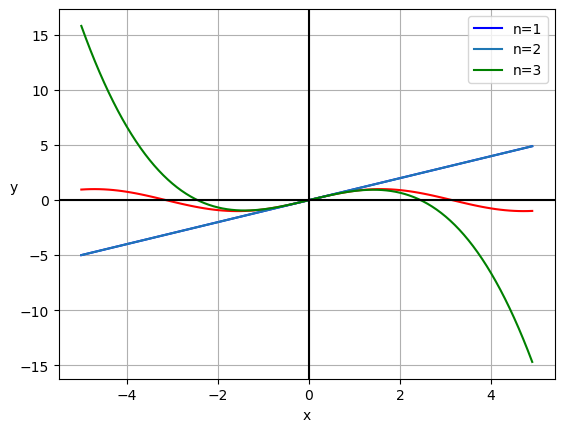

In [17]:
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x)

x = np.arange(-5, 5, 0.1)
plt.plot(x, f(x), "r")

plt.plot(x, x, "b", label='n=1')
plt.plot(x, x, label='n=2')
plt.plot(x, -0.16667 * x ** 3 + x, "g", label='n=3')

# параметры координатной плоскости
plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.grid()
plt.legend()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.show()

Б)

In [18]:
x = Symbol('x')
print('f(x) = cos(x)')
f = cos(x)
n = 1
point = 0
getTaylor([point, n, getFuncDerValue(f, point, n)])

n = 2
point = 0
getTaylor([point, n, getFuncDerValue(f, point, n)])

n = 4
point = 0
getTaylor([point, n, getFuncDerValue(f, point, n)])

f(x) = cos(x)
1
1 - 0.5*x**2
0.041667*x**4 - 0.5*x**2 + 1


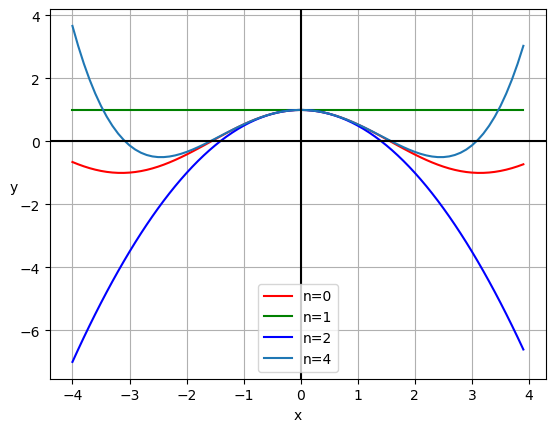

In [19]:
def f(x):
    return np.cos(x)

x = np.arange(-4, 4, 0.1)
plt.plot(x, f(x), "r", label='n=0')

plt.plot(x, 1+0*x, "g", label='n=1')
plt.plot(x, 1 - 0.5*x**2, "b", label='n=2')
plt.plot(x, 0.041667*x**4 - 0.5*x**2 + 1, label='n=4')

# параметры координатной плоскости
plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.grid()
plt.legend()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.show()

В)

In [20]:
x = Symbol('x')
print('f(x) = ln(4 + x)')
f = cos(x)
n = 1
point = 0
getTaylor([point, n, getFuncDerValue(f, point, n)])

n = 2
point = 0
getTaylor([point, n, getFuncDerValue(f, point, n)])

n = 4
point = 0
getTaylor([point, n, getFuncDerValue(f, point, n)])

f(x) = ln(4 + x)
1
1 - 0.5*x**2
0.041667*x**4 - 0.5*x**2 + 1


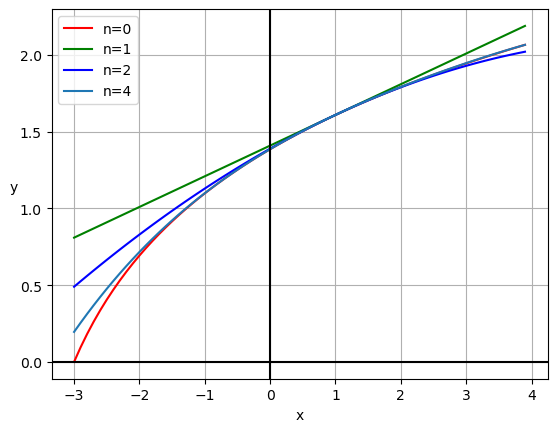

In [21]:
def f(x):
    return np.log(4+x)

x = np.arange(-3, 4, 0.1)
plt.plot(x, f(x), "r", label='n=0')

plt.plot(x, 0.2*x + 1.41, "g", label='n=1')
plt.plot(x, 0.2*x - 0.02*(x - 1)**2 + 1.41, "b", label='n=2')
plt.plot(x, 0.2*x - 0.0004*(x - 1)**4 + 0.003*(x - 1)**3 - 0.02*(x - 1)**2 + 1.41, label='n=4')

# параметры координатной плоскости
plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.grid()
plt.legend()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.show()

С1

In [22]:
def f(x):
    return np.sqrt(4+x)

def getTaylor(array):
    x0 = array[0]
    n = array[1]
    vec = array[2]
    collectTaylor(x0, n, vec)

def collectTaylor(point, num, values):
    larr = []
    for i in range(num + 1):
        larr.append(round(values[i] / math.factorial(i), i + 2) * (x - point) ** i)
    eq = 0
    for i in range(len(larr)):
        eq += larr[i]
    print(eq)

def getFuncDerValue(func, point, n):
    arr = []
    for i in range(n + 1):
        arr.append(round(func.subs(x, point), 2))
        func = func.diff(x)
    return arr

x = Symbol('x')

function = sqrt(4+x)

n = 1
point = 0
getTaylor([point, n, getFuncDerValue(function, point, n)])

n = 2
point = 0
getTaylor([point, n, getFuncDerValue(function, point, n)])

n = 4
point = 0
getTaylor([point, n, getFuncDerValue(function, point, n)])

0.25*x + 2
-0.02*x**2 + 0.25*x + 2
-0.0004*x**4 + 0.002*x**3 - 0.02*x**2 + 0.25*x + 2


C2

In [23]:
# a)

from scipy.interpolate import approximate_taylor_polynomial
import numpy as np

point = 0
n = 7

def f(x):
    return np.sin(x)

print(approximate_taylor_polynomial(f, point, n, 1, order=n+10))

            7             6            5             4          3
-0.0001984 x - 2.263e-13 x + 0.008333 x + 4.623e-14 x - 0.1667 x
              2
 - 2.722e-15 x + 1 x + 2.394e-17


In [24]:
def f(x):
    return np.e**x

print(approximate_taylor_polynomial(f, point, n, 1, order=n+10))

           7            6            5           4          3       2
0.0001984 x + 0.001389 x + 0.008333 x + 0.04167 x + 0.1667 x + 0.5 x + 1 x + 1


In [25]:
def f(x):
    return np.log(1+x)

print(approximate_taylor_polynomial(f, point, n, 1, order=n+10))

       7         6         5          4          3          2
26.57 x + 9.616 x - 4.403 x - 0.9147 x + 0.6622 x - 0.4873 x + 0.9936 x - 1.521e-16


In [26]:
def f(x):
    return np.tan(x)

print(approximate_taylor_polynomial(f, point, n, 1, order=n+10))

         7             6          5             4          3
0.05165 x + 5.134e-12 x + 0.1337 x - 7.139e-13 x + 0.3333 x
              2
 - 3.908e-16 x + 1 x + 6.387e-17


In [27]:
# б)

point = np.pi/2
n = 5

def f(x):
    return np.sin(x)

print(approximate_taylor_polynomial(f, point, n, 1, order=n+10))

            5           4             3       2
-4.049e-14 x + 0.04167 x + 7.645e-15 x - 0.5 x - 2.855e-16 x + 1


In [28]:
def f(x):
    return np.cos(x)

print(approximate_taylor_polynomial(f, point, n, 1, order=n+10))

           5             4          3             2
-0.008333 x + 8.931e-15 x + 0.1667 x - 8.973e-16 x - 1 x + 1.066e-16
